<a href="https://colab.research.google.com/github/isaevadaryna/Machine-Learning/blob/main/%D0%86%D1%81%D0%B0%D1%94%D0%B2%D0%B0_%D0%94_%D0%9E_%2C_%D0%A4%D0%86%D0%A2%2C_4_9%2C_%D0%9B%D0%B0%D0%B1_4_(%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='whitegrid')
RANDOM_STATE = 42

In [10]:
d = load_diabetes(as_frame=True)
df = d.frame.copy()
print("Колонки:", df.columns.tolist())

Колонки: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [11]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [12]:
print(df.isnull().sum())
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("Пропуски замінено на середнє")
else:
    print("Пропусків немає")

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Пропусків немає


In [13]:
dups = df.duplicated().sum()
print(f"Дублікати: {dups}")
if dups > 0:
    df = df.drop_duplicates()
    print("Дублікати видалено")

Дублікати: 0


In [14]:
if 'sex' in df.columns:
    print("Унікальні значення у sex:", df['sex'].unique())
    if df['sex'].dtype == 'O' or df['sex'].dtype.name == 'category':
        df['sex'] = df['sex'].map({"male":1, "female":0})
        print("sex закодовано 0/1")

Унікальні значення у sex: [ 0.05068012 -0.04464164]


In [15]:
print(df.dtypes)
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


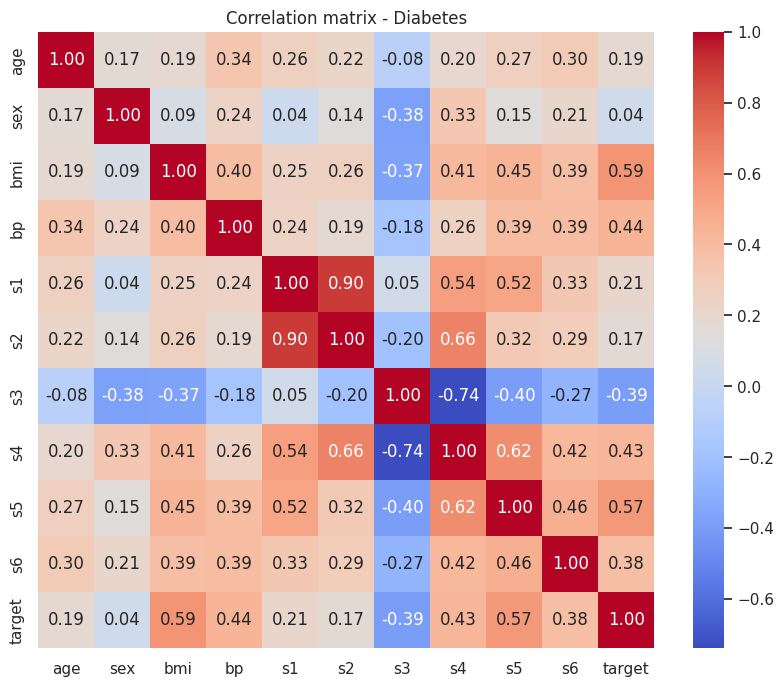

In [16]:
corr_with_target = df.corr()['target'].drop('target').sort_values(ascending=False)
print(corr_with_target)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix - Diabetes")
plt.show()

In [19]:
features = df.drop(columns=['target'])
target = df['target']
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=RANDOM_STATE
)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape)

X_train.shape: (353, 10) X_test.shape: (89, 10)


In [22]:
# Вибираємо топ-5 ознак за кореляцією
top_features = corr_with_target.index[:5].tolist()
print("Використані ознаки:", top_features)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train[top_features], y_train)
y_pred_lr = lr.predict(X_test[top_features])

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train[top_features], y_train)
y_pred_rf = rf.predict(X_test[top_features])

Використані ознаки: ['bmi', 's5', 'bp', 's4', 's6']


In [23]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} -> R2: {r2:.3f}, MSE: {mse:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression -> R2: 0.453, MSE: 2899.743
Random Forest -> R2: 0.417, MSE: 3086.416


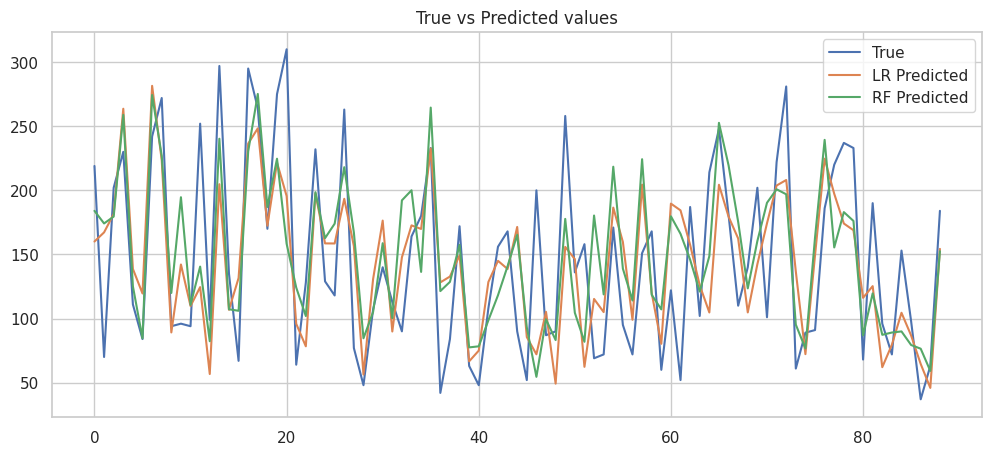

In [24]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="True")
plt.plot(y_pred_lr, label="LR Predicted")
plt.plot(y_pred_rf, label="RF Predicted")
plt.legend()
plt.title("True vs Predicted values")
plt.show()

In [25]:
res_df = pd.DataFrame({
    "True": y_test.values,
    "LR_Pred": y_pred_lr,
    "RF_Pred": y_pred_rf
})
print(res_df.head(20))

     True     LR_Pred  RF_Pred
0   219.0  160.079344   184.01
1    70.0  167.202676   174.17
2   202.0  181.557882   179.52
3   230.0  263.634780   258.85
4   111.0  138.707761   125.14
5    84.0  119.541729    84.56
6   242.0  281.503699   274.34
7   272.0  223.658060   227.07
8    94.0   89.158830   119.95
9    96.0  142.159825   194.62
10   94.0  109.752464   110.64
11  252.0  124.517208   140.52
12   99.0   56.719726    82.28
13  297.0  204.765215   240.25
14  135.0  106.812036   107.22
15   67.0  131.602367   106.04
16  295.0  236.457537   230.30
17  264.0  248.347995   275.18
18  170.0  172.422701   187.01
19  275.0  221.632931   224.65
